# SNOW Network Extraction

The SNOW algorithm, [published in Physical Review E](https://doi.org/10.1103/PhysRevE.96.023307), uses a marker-based watershed segmentation algorithm to partition an image into regions belonging to each pore.  The main contribution of the SNOW algorithm is to find a suitable set of initial markers in the image so that the watershed is not over-segmented.  SNOW is an acronym for Sub-Network of an Over-segmented Watershed.  This code works on both 2D and 3D images.  In this example a 2D image will be segmented using the predefined ``snow`` function in PoreSpy. 

Start by importing the necessary packages:

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()
np.random.seed(10)
ws = op.Workspace()
ws.settings['loglevel'] = 50

Generate an artificial 2D image for illustration purposes:

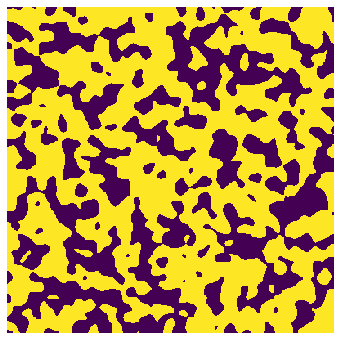

In [2]:
# NBVAL_IGNORE_OUTPUT
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.figure(figsize=(6, 6))
plt.imshow(im)
plt.axis('off')
plt.show()

SNOW is composed of a series of filters, but PoreSpy has a single function that applies all the necessary steps:

In [3]:
# NBVAL_IGNORE_OUTPUT
snow_output = ps.networks.snow2(phases=im)

The ``snow`` function returns a python *dict* that is suitable for use in OpenPNM.

In [4]:
net, get = op.io.PoreSpy.import_data(snow_output)

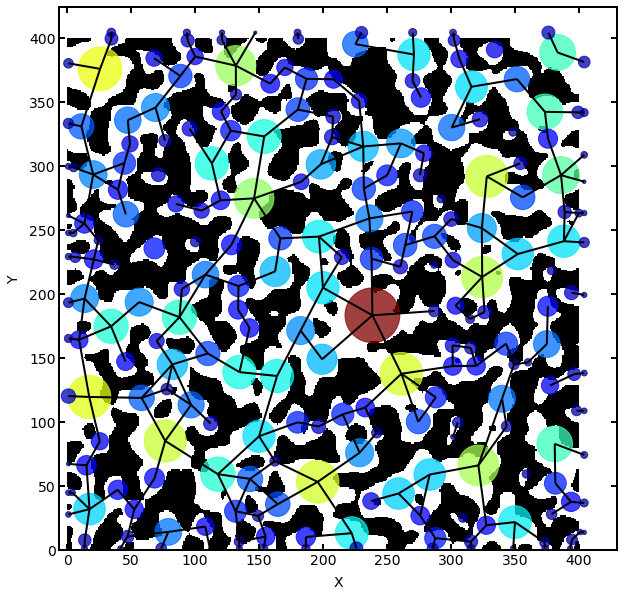

In [5]:
fig = plt.figure(figsize=[10, 10])
plt.imshow(im.T, cmap=plt.cm.bone)
fig = op.topotools.plot_connections(net, color='k', linewidth=2, fig=fig)
fig = op.topotools.plot_coordinates(network=net, 
                                    size_by=net['pore.region_volume'], 
                                    color_by=net['pore.region_volume'], 
                                    markersize=3000, 
                                    alpha=0.75, 
                                    fig=fig)